In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Data Pre processing

In [2]:
df = pd.read_csv("Tesla.csv")

In [3]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [5]:
df.drop("Date",1, inplace=True)

In [6]:
data_x = df.drop(columns="Adj Close" ,).values.tolist()
data_y = df["Adj Close"].tolist()

In [7]:
data_x[0] , data_y[0]

([19.0, 25.0, 17.540001, 23.889999, 18766300.0], 23.889999)

In [8]:
len(data_x)

1692

# Building Network

In [9]:
import torch
import torch.nn as nn
from torch.nn import functional as F



In [10]:
device = "cpu"
if torch.cuda.is_available():
    device = "cuda"

In [11]:
train_x , train_y , test_x , test_y = np.array(data_x[:1000]) , np.array(data_y[:1000]) , np.array(data_x[1000:]) , np.array(data_y[1000:])

train_x = torch.from_numpy(train_x).float().to(device)
train_y = torch.from_numpy(train_y).float().to(device)

test_x = torch.from_numpy(test_x).float().to(device)
test_y = torch.from_numpy(test_y).float().to(device)



In [12]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.input = nn.Linear(5 , 40)
        self.h1 = nn.Linear(40  , 100)
        self.h2 = nn.Linear(100, 60)
        self.out = nn.Linear(60 , 1)
        self.activation = nn.ReLU()
    
    def forward(self , x):
        x = self.activation(self.input(x))
        x = self.activation(self.h1(x))
        x = self.activation(self.h2(x))
        x = self.out(x)
        return x

    


In [13]:
Net()

Net(
  (input): Linear(in_features=5, out_features=40, bias=True)
  (h1): Linear(in_features=40, out_features=100, bias=True)
  (h2): Linear(in_features=100, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=1, bias=True)
  (activation): ReLU()
)

In [14]:
model = Net().to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters() , lr=0.0001)


In [15]:
from  tqdm import tqdm

# Training Network

  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 1000/1000 [00:02<00:00, 463.96it/s]


Text(0, 0.5, 'Loss Value')

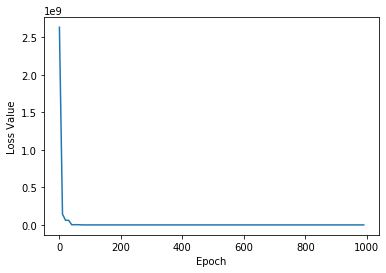

In [16]:
epochs = 1000
evey = 10
loss_vals = []
plt_x = []

for epoch in tqdm(range(epochs)):
    
    y = model(train_x)
    loss = criterion(y , train_y)    
    
    if epoch % evey ==0 :
#         print( f"Epoch:{epoch}  , Loss:{loss.squeeze_()}")
        
        loss_vals.append(loss.data.item())
        plt_x.append(epoch)
    
    loss.backward()
    optimizer.step()
    model.zero_grad()
    
plt.plot(plt_x , loss_vals , label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")

# Testing

In [17]:
correct = total = 0
test_x = test_x.to(device)
test_y = test_y.to(device)

for i in range(len(test_x)):
    output = model.forward(test_x[i])
#     print(int(output.data.item() ), int(test_y[i]))
    if int(output.data.item() ) == int(test_y[i]):
        correct +=1
    total +=1
print(f"Correct:{correct} , Total:{total} ,Accuracy {correct/total * 100} %")

Correct:0 , Total:692 ,Accuracy 0.0 %


# Machine Learning

In [18]:
train_x , train_y , test_x , test_y = np.array(data_x[:1000]) , np.array(data_y[:1000]) , np.array(data_x[1000:]) , np.array(data_y[1000:])


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [20]:
model = LinearRegression()


In [21]:
model.fit(train_x , train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print(f"Accuracy :{model.score(test_x , test_y) * 100} %")

Accuracy :100.0 %


# Sometimes it's good to use Machine Learning instead of Deep Learning , when we have less amount of data.